In [201]:
import torch
import cv2
import os
import glob
import pathlib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

dataset_path = "asl_dataset/"
background_path = "house_data/"

In [95]:
os.getcwd()

'/Users/panavshah/Desktop/Desktop - Panav’s MacBook Pro/coding_stuff/Seasons_of_Code_ASL2TXT/Final_Project'

In [96]:
# for root, dirs, files in os.walk(dataset_path):
#     print(f"Root : {root}")
#     print(f"Dirs : {dirs}")
#     print(f"Files : {len(files)}")

In [97]:
dataset_path

'asl_dataset/'

In [98]:
pattern = "*.jpeg"

images = list(pathlib.Path(dataset_path).glob("*/*.jpeg"))
images[:5]

[PosixPath('asl_dataset/r/hand2_r_top_seg_2_cropped.jpeg'),
 PosixPath('asl_dataset/r/hand2_r_right_seg_1_cropped.jpeg'),
 PosixPath('asl_dataset/r/hand2_r_top_seg_5_cropped.jpeg'),
 PosixPath('asl_dataset/r/hand3_r_dif_seg_1_cropped.jpeg'),
 PosixPath('asl_dataset/r/hand2_r_bot_seg_3_cropped.jpeg')]

In [99]:
os.path.dirname(images[0]).split('/')[1]

'r'

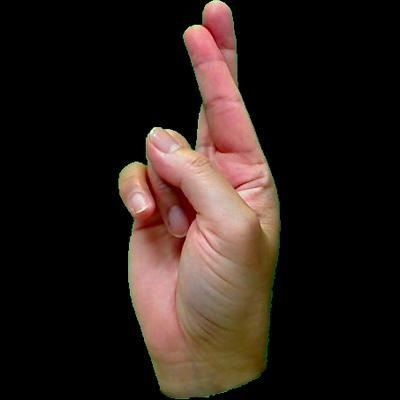

In [100]:
Image.open(images[0])

In [101]:
class ImageData:
    def __init__(self, image_path):
        self.image_path = image_path
        self.label = os.path.dirname(image_path).split('/')[1]
        self.image = Image.open(image_path)
        self.image_array = cv2.resize(cv2.imread(image_path), (128, 128))

In [102]:
image_objects = []
for image_dir in images:
    image_objects.append(ImageData(image_dir))


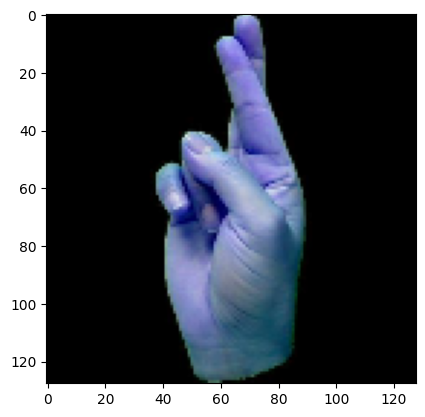

In [103]:
plt.imshow(image_objects[0].image_array)

In [104]:
bg_images = list(pathlib.Path(background_path).glob("*.jpg"))
bg_images[:10]

[PosixPath('house_data/bath_585.jpg'),
 PosixPath('house_data/kitchen_752.jpg'),
 PosixPath('house_data/din_531.jpg'),
 PosixPath('house_data/din_257.jpg'),
 PosixPath('house_data/din_1123.jpg'),
 PosixPath('house_data/living_932.jpg'),
 PosixPath('house_data/din_1137.jpg'),
 PosixPath('house_data/din_243.jpg'),
 PosixPath('house_data/bed_1229.jpg'),
 PosixPath('house_data/kitchen_746.jpg')]

In [105]:
len(bg_images)

5249

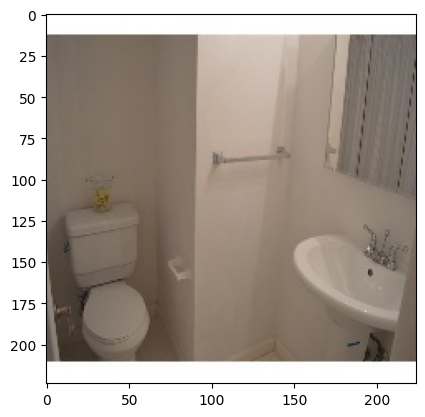

In [106]:
bg_img = np.array(Image.open(bg_images[0]))
plt.imshow(bg_img)

In [107]:
bg_img.shape

(224, 224, 3)

In [108]:
random.randint(1, 10)

3

In [109]:
class BackgroundData:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = Image.open(image_path)
        self.image_array = cv2.imread(image_path)
        self.x, self.y = self.image_array.shape[1], self.image_array.shape[0]

    def crop_image(self):
        randx = random.randint(0, self.x - 128)
        randy = random.randint(0, self.y - 128)
        return(self.image_array[randx:randx+128, randy:randy+128])
    

In [110]:
bg_objects = []
for bg_img in bg_images:
    bg_objects.append(BackgroundData(bg_img))

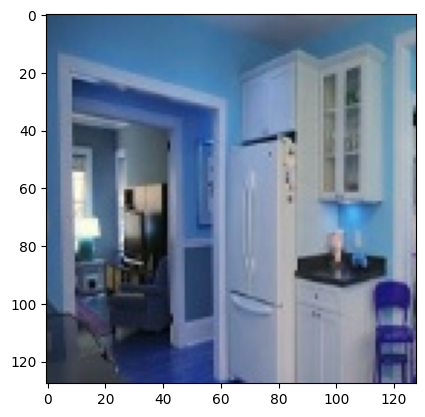

In [111]:
plt.imshow(bg_objects[100].crop_image())

In [156]:
def add_background(img, bg):
    mask = np.all((img.image_array >= [0, 0, 0]) & (img.image_array <= [20, 20, 20]), axis=-1)
    # print(mask.shape)
    # print(img.image_array.shape, bg.image_array.shape)
    result = img.image_array.copy()
    result[mask] = bg.crop_image()[mask]
    return cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

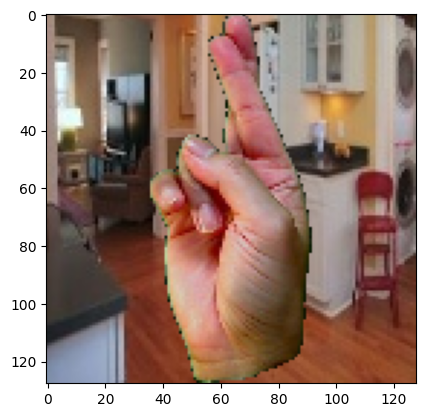

In [157]:
plt.imshow(add_background(image_objects[10], bg_objects[100]))

In [206]:
def ensure_directory_exists(directory):
    os.makedirs(directory, exist_ok=True)

def image_backgrounds(img):
    img_path = img.image_path
    img_path_name, img_path_ex = str(img_path).rsplit('.', 1)  # Split at the last dot

    img_path_name1 = img_path_name.replace('asl_dataset', 'asl_dataset_new')
    
    output_directory = os.path.dirname(img_path_name1)
    ensure_directory_exists(output_directory)
    
    for i in range(10):
        rand_num = random.randint(0, len(bg_images) - 1)
        bg = bg_objects[rand_num]
        img_with_bg = add_background(img, bg)  
        
        # plt.subplot(2, 5, i+1)
        # plt.imshow(img_with_bg)
        # plt.axis('off')  
        
        path = f"{img_path_name1}_{i}.{img_path_ex}"
        # print(f"Saving image {i+1} to {path}")
        
        cv2.imwrite(path, cv2.cvtColor(img_with_bg, cv2.COLOR_RGB2BGR))
        
        # plt.show()  

In [207]:
for image_object in tqdm(image_objects):
    image_backgrounds(image_object)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2515/2515 [01:24<00:00, 29.76it/s]
